In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data_processing_functions import parameter_tuning_read_and_mean
csv_path = "/home/jens/masterData/AlgorithmTuner/ScoreThresholdTuning/BL-data.csv"
tested_parameter = "BL/Score Threshold"

df =  pd.read_csv(csv_path,usecols=["algName","objName",tested_parameter,"f1","precision","recall","accuracy"],dtype={"algName":"category","objName":"category"})
df_mean = df.groupby(["algName","objName",tested_parameter]).mean().reset_index()
df_std = df.groupby(["algName","objName",tested_parameter]).std().reset_index()
df.head()

,algName,objName,precision,recall,accuracy,f1,BL/Score Threshold
0,BL,AngleTubes,0.903226,1.0,0.903226,0.949153,0.0
1,BL,AngleTubes,0.903226,1.0,0.903226,0.949153,0.5
2,BL,AngleTubes,0.903226,1.0,0.903226,0.949153,1.0
3,BL,AngleTubes,0.903226,1.0,0.903226,0.949153,1.5
4,BL,AngleTubes,0.903226,1.0,0.903226,0.949153,2.0


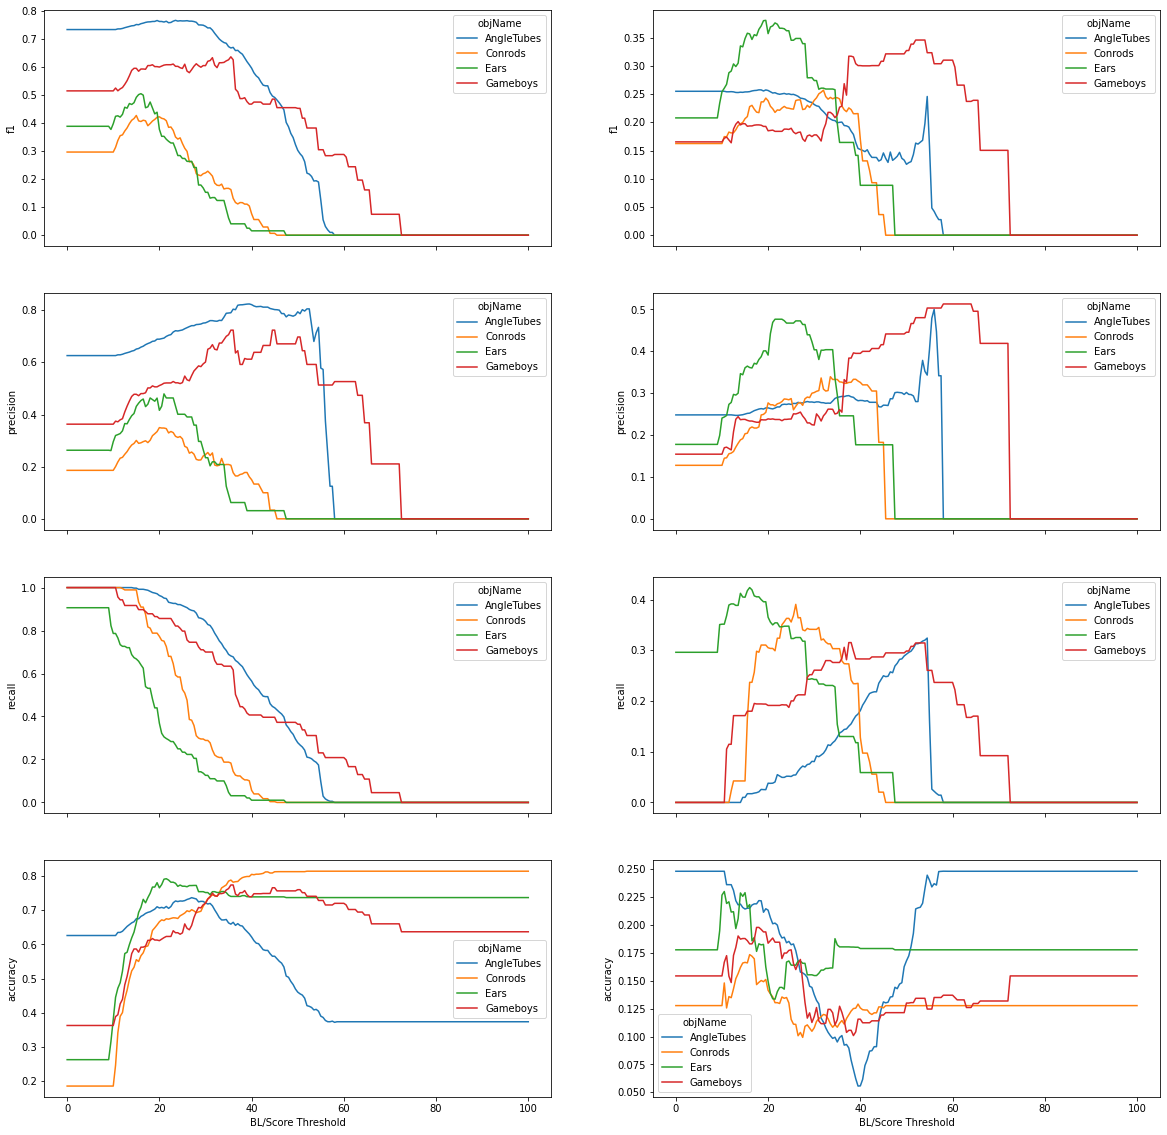

In [10]:

validation_measure = ["f1","precision","recall","accuracy"]
fig,axes = plt.subplots(len(validation_measure),2,figsize=(len(validation_measure)*5,len(validation_measure)*5),sharex = True)
for ax,vm in zip(axes[:,0],validation_measure):
    sns.lineplot(x=tested_parameter,y=vm,hue="objName",data=df_mean,ax=ax)
for ax,vm in zip(axes[:,1],validation_measure):
    sns.lineplot(x=tested_parameter,y=vm,hue="objName",data=df_std,ax=ax)
plt.show()

In [11]:
tuning_measure = "f1"
max_idx = df_mean.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df_mean.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

AngleTubes,BL,Score Threshold,23.5
Conrods,BL,Score Threshold,15.0
Ears,BL,Score Threshold,16.0
Gameboys,BL,Score Threshold,35.5


In [ ]:
tuning_measure = "f1"

#Mean
max_idx = df_mean.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df_mean.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

#Standart deviation
max_idx = df_std.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df_std.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))